In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
def linreg_constant(x, y, y_err=None, conf=0.9):
    weights = 1/y_err**2 if y_err is not None else np.ones_like(y)
    X = np.c_[np.ones_like(x), x]
    W = np.diag(weights)
    beta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
    
    # stats
    y_pred = X @ beta
    residuals = y - y_pred
    dof = len(x) - 2
    r = np.corrcoef(x, y)[0, 1]
    
    # confidence interval
    t = stats.t.ppf((1 + conf)/2, dof)
    X_mean = np.mean(x)
    Sxx = np.sum((x - X_mean)**2)
    se = np.sqrt(np.sum(residuals**2)/dof * (1/len(x) + (x - X_mean)**2/Sxx))
    ci = t * se
    
    return *beta, r, y_pred, y_pred - ci, y_pred + ci

In [9]:
def linreg_variable(x, y, y_err, conf=0.9):
    weights = 1/y_err**2
    X = np.c_[np.ones_like(x), x]
    W = np.diag(weights)
    beta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
    
    y_pred = X @ beta
    residuals = y - y_pred
    dof = len(x) - 2
    
    x_wmean = np.sum(weights * x)/np.sum(weights)
    y_wmean = np.sum(weights * y)/np.sum(weights)
    cov_xy = np.sum(weights * (x - x_wmean) * (y - y_wmean))
    cov_xx = np.sum(weights * (x - x_wmean)**2)
    cov_yy = np.sum(weights * (y - y_wmean)**2)
    r = cov_xy / np.sqrt(cov_xx * cov_yy)
    
    t = stats.t.ppf((1 + conf)/2, dof)
    cov = np.linalg.inv(X.T @ W @ X)
    pred_std = np.sqrt(np.diag(X @ cov @ X.T))
    ci = t * pred_std
    
    return *beta, r, y_pred, y_pred - ci, y_pred + ci

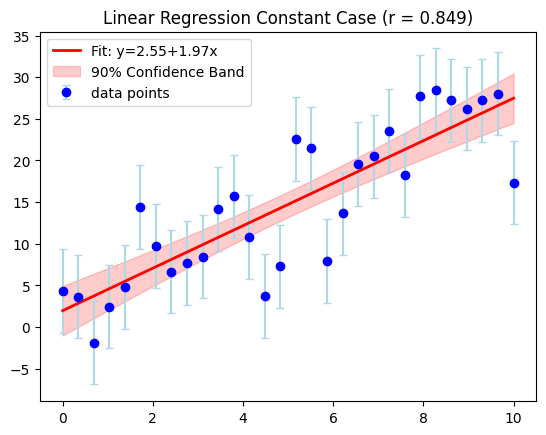

slope=1.968, intercept=2.550, r=0.849


In [11]:
x = np.linspace(0, 10, 30)
y_true = 1.0 + 2.5 * x
y_err = 5 * np.ones_like(x)
y = y_true + np.random.normal(0, y_err)

slope, intercept, r, y_pred, y_low, y_high = linreg_constant(x, y, y_err)

plt.errorbar(x, y, yerr=y_err, fmt='o', color='b', ecolor='lightblue', capsize=3, label='data points')
plt.plot(x, y_pred, 'r-', lw=2, label=f'Fit: y={intercept:.2f}+{slope:.2f}x')
plt.fill_between(x, y_low, y_high, color='red', alpha=0.2,  label=f'90% Confidence Band')
plt.title(f'Linear Regression Constant Case (r = {r:.3f})')
plt.legend()
plt.show()

print(f"{slope=:.3f}, {intercept=:.3f}, {r=:.3f}")

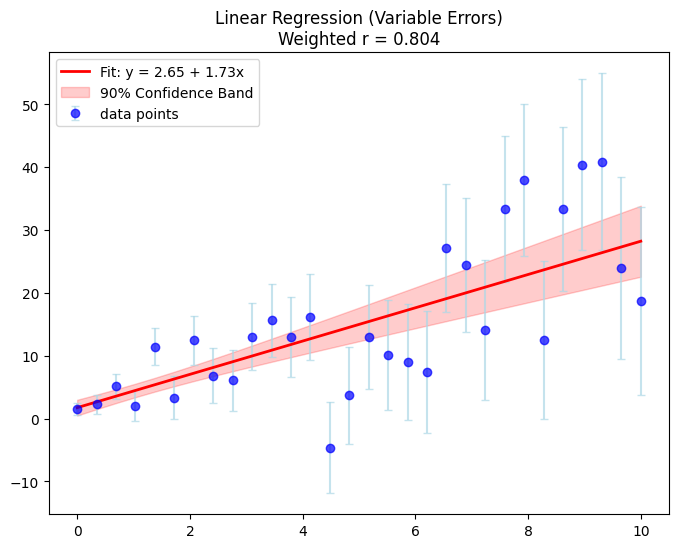

slope=1.729, intercept=2.647, r=0.804


In [12]:
x = np.linspace(0, 10, 30)
y_true = 1.0 + 2.5 * x
y_err = np.linspace(1, 15, len(x))
y = y_true + np.random.normal(0, y_err)

slope, intercept, r, y_pred, y_low, y_high = linreg_variable(x, y, y_err)

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=y_err, fmt='o', color='b',
             ecolor='lightblue', capsize=3, alpha=0.7, label='data points')
plt.plot(x, y_pred, 'r-', lw=2, label=f'Fit: y = {intercept:.2f} + {slope:.2f}x')
plt.fill_between(x, y_low, y_high, color='r', alpha=0.2,
                label=f'90% Confidence Band')
plt.title(f'Linear Regression (Variable Errors)\nWeighted r = {r:.3f}')
plt.legend()
plt.show()

print(f"{slope=:.3f}, {intercept=:.3f}, {r=:.3f}")